# Probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
plt.rcParams.update({
    "figure.figsize" : (10,5)
})

## References


[khanacademy](https://www.youtube.com/user/khanacademy), [Stanford edu](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics), [University of Toronto](http://www.utstat.toronto.edu/mikevans/jeffrosenthal/book.pdf), [Probabilty for Statistics and Machine Learning](https://www.amazon.in/Probability-Statistics-Machine-Learning-Fundamentals-ebook/dp/B00F5UGP0O)


## Definition 

Probability is the science of uncertainty. Probability is a universally accepted tool for expressing degrees of confidence or
doubt about some proposition in the presence of incomplete information or uncertainty.

## Infinite Series

We can understand a series like a sequence of operations done till the success result is achieved.
lets say success is achieved at Nth operation then N-1 operations are sequence of failures.

### Geometric Series

- sum of a finite or infinite sequence of numbers with constant ratio between successive terms.
- these events are discrete.

\begin{align}
\text{finite series } &= \{1, r, r^{2}, ..., r^{n}\}\\
\text{infinite series } &= \{1, r, r^{2}, r^{3}, ... \}
\end{align}

\begin{align}
\text{sum of finite series } &= 1 + r + r^{2} + ... + r^{n} = \sum_{k=1}^{n} r^n = \frac{1 - r^{n+1}}{1 - r}\\
\text{sum of infinite series } &= 1 + r + r^{2} + r^{3} + ... = \sum_{k=1}^{\infty} r^n =  \frac{1}{1 - r}
\end{align}


> below example is of probability of getting a head after N-1 operations.

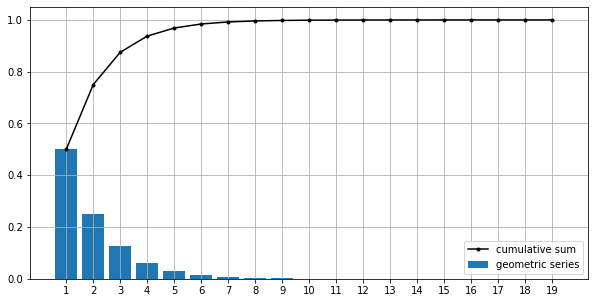

In [22]:
k = np.arange(1, 20)
r = 0.5

x = np.power(r, k)
cs = x.cumsum()

plt.bar(k, x, label='geometric series')
plt.plot(k, cs, 'k.-', label='cumulative sum')
plt.xticks(k)
plt.legend()
plt.grid()

first bar probability of getting a head on first toss 0.5, second bar proabability of getting one head on second toss(first toss was tail) 0.25,
third bar probability of getting a head on third toss after 2 failures (tails) 0.125.

### Binomial Series


Difference from Geometric Series is GS deals with dependent sequential operations and Binomial Series deals with unique independent operations done repeatedly.

Like getting exactly one head if three coins are flipped or three independent operations of flipping coins and we look for all possible combinations for the event.


\begin{align}
(a + b)^n &= \sum_{k=0}^{n} {n \choose k} a^{n-k} b^k
\end{align}


\begin{align}
\text{where }
{n \choose k} &= \text{ n choose k } = \frac{n!}{k!(n-k)!}\\
a, b &= \text{real numbers}
\end{align}

In [32]:
from scipy.special import comb, factorial

n = 10
k = 2

( 
    comb(n, k), # n choose k 
    factorial(k)
)

(45.0, 2.0)

#### Pascal's Identity

let n and k be positive integers, such that $k \le n$


\begin{align}
{n \choose k} &+ {n \choose k-1} = {n+1 \choose k}\\
\text{or}\\
{n \choose k} &= {n-1 \choose k-1} + {n-1 \choose k}
\end{align}

**Pascals Triangle**

```
                     1
                     
                 1       1
                   
             1       2       1
             
         1       3       3       1
             __________
     1      | 4      6 |      4       1
            |  \    /  |
 1       5  |    10    | 10      5       1
```

\begin{matrix}
& 4   &&   && 6\\
& & \searrow  && \swarrow\\
& && 10
\end{matrix}

## Spaces 

**Sample Space $\Omega$** The set of all possible outcomes of an experiment is known as the sample space of the experiment ($\xi$) and is denoted by S.

**Event Space** E Let $\Omega$ be the sample space of an experiment . Then any subset A of $\Omega$, including the empty set $\phi$ and the entire sample space $\Omega$ is called an event.


\begin{align}
\text{probability} = \frac{\text{# of possibilities that meet my conditions}}{\text{# of equally likely possibilities}}
\end{align}

Some very simple eamples of probability with single event

1. tossing a fair coin once. (H, T)

    - Probability of getting a head | p(H)= $\frac{1}{2}$, Probability of getting a head and a tail | p(H or T)= 1 (duh..)
    - Probability of getting a head and a tail | p(H and T)= 0 (mutually exclusive events)

1. rolling a fair dice once. (1, 2, 3, 4, 5, 6)

    - Probability of getting 2 | p(2)= $\frac{1}{6}$
    - p(2 or 6) = $\frac{2}{6}$ = $\frac{1}{3}$, p(even) = $\frac{3}{6}$
    - p(2 and 6) = 0 (mutually exclusive events)

1. picking a card from a fair deck. cards=(A, K, Q, J, 10, ..., 2) suits=(hearts, spade, diamonds, clubs)

    - p(J) = $\frac{4}{52}$, p(hearts) = $\frac{13}{52}$, p(J and hearts) = $\frac{1}{52}$
    - p(J or hearts) = $\frac{4}{52} + \frac{13}{52} - \frac{1}{52}$ = $\frac{16}{52}$ (1 event is common in both conditions -> J of hearts) = p(J) + p(hearts) - p(J and hearts)
    
1. we have a bag with 9 red, 2 blue, 3 green marbles.

    - What is the probability of selecting a non-blue marble? - not blue = 9 red and 3 green = $\frac{12}{14}$

## Conditional Probability & Independence

When we have 2 events and they are dependent, like when one event occurs, it effects the possibility or beliefs of second event, then there is a factor of conditional probability.

Let A, B be general events with respect to a sample space $\Omega$ and P(A) > 0, the conditional probability of event B when given event A is 

\begin{equation}
P(B|A) = \frac{P(A \cap B)}{P(A)}
\end{equation}

**Total Probability Formula**\
if we have bunch of events $A_1, A_2, A_3, ..., A_k$ part of a sample space $\Omega$

with condition

$A_i \cap A_j = \phi$ for all $i \ne j$ and 

$\cup_{i=1}^{k}A_i = \Omega$ and


$0 \lt P(A_i) \lt 1$ then

\begin{equation}
P(B) = \sum_{i = 1}^{k} P(B|A_i)P(A_i)
\end{equation}

## Compound Probability

$P(A \text{ or } B) = P(A) + P(B) - P(A \text{ and } B)$

or 

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$